In [1]:
#Create and save the sample dataset
import pandas as pd

data = {
    'Size': [1400, 1600, 1200, 1800, 1100, 1500, 1700, 1300, 1450, 1550],
    'Location': ['urban', 'suburban', 'rural', 'urban', 'suburban', 'rural', 'urban', 'suburban', 'rural', 'urban'],
    'Number of Rooms': [3, 4, 2, 4, 2, 3, 4, 3, 3, 3],
    'Price': [350000, 400000, 250000, 520000, 450000, 240000, 300000, 420000, 310000, 370000]
}

df = pd.DataFrame(data)
df.to_csv('house_prices.csv', index=False)
print("CSV file 'house_prices.csv' saved!")

CSV file 'house_prices.csv' saved!


   Size  Location  Number of Rooms   Price
0  1400     urban                3  350000
1  1600  suburban                4  400000
2  1200     rural                2  250000
3  1800     urban                4  520000
4  1100  suburban                2  450000
Size               0
Location           0
Number of Rooms    0
Price              0
dtype: int64
              Size  Number of Rooms          Price
count    10.000000        10.000000      10.000000
mean   1460.000000         3.100000  361000.000000
std     218.326972         0.737865   89249.961096
min    1100.000000         2.000000  240000.000000
25%    1325.000000         3.000000  302500.000000
50%    1475.000000         3.000000  360000.000000
75%    1587.500000         3.750000  415000.000000
max    1800.000000         4.000000  520000.000000


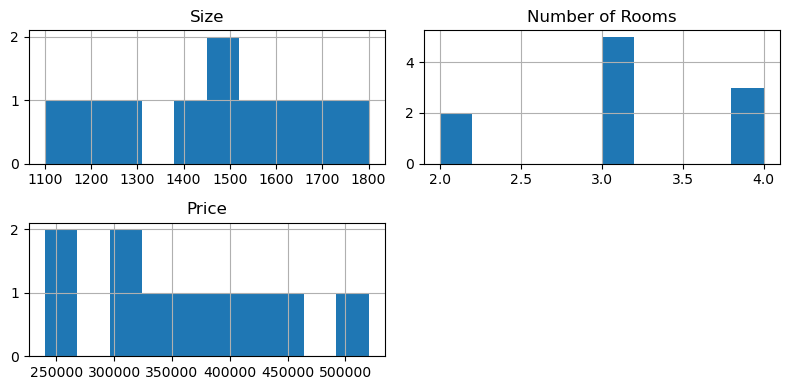

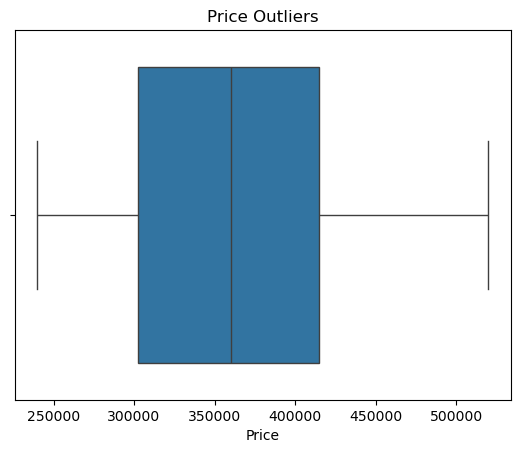

In [2]:
# Load and explore the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('house_prices.csv')

# Preview the data
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Basic statistics
print(df.describe())

# Visualize numerical columns
df.hist(['Size', 'Number of Rooms', 'Price'], figsize=(8, 4))
plt.tight_layout()
plt.show()

# Detect outliers with boxplot
sns.boxplot(x=df['Price'])
plt.title('Price Outliers')
plt.show()

In [3]:
# Drop missing values (if any)
df.dropna(inplace=True)

In [4]:
# Normalize numeric features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Size', 'Number of Rooms']] = scaler.fit_transform(df[['Size', 'Number of Rooms']])

In [5]:
# Encode categorical 'Location'
if 'Location' in df.columns:
    df = pd.get_dummies(df, columns=['Location'], drop_first=True)

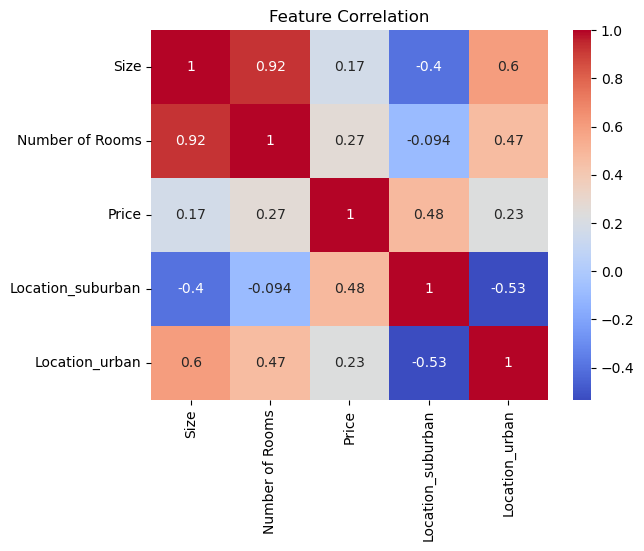

In [6]:
# Correlation matrix
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [7]:
# Train-test split and model training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define X and y
X = df.drop('Price', axis=1)
y = df['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Evaluate model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict
y_pred = model.predict(X_test)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# R² Score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

# Compare Actual vs Predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head(10))

RMSE: 71726.93186409013
R² Score: -1.5406186442646064
   Actual      Predicted
8  310000  229754.098361
1  400000  462049.180328
